In [209]:
%config InlineBackend.figure_format = 'retina'
!sudo apt-get -qq -y install fonts-nanum

In [210]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
mpl.font_manager._rebuild()
fm._rebuild()

Text(0.3, 0.3, '한글')

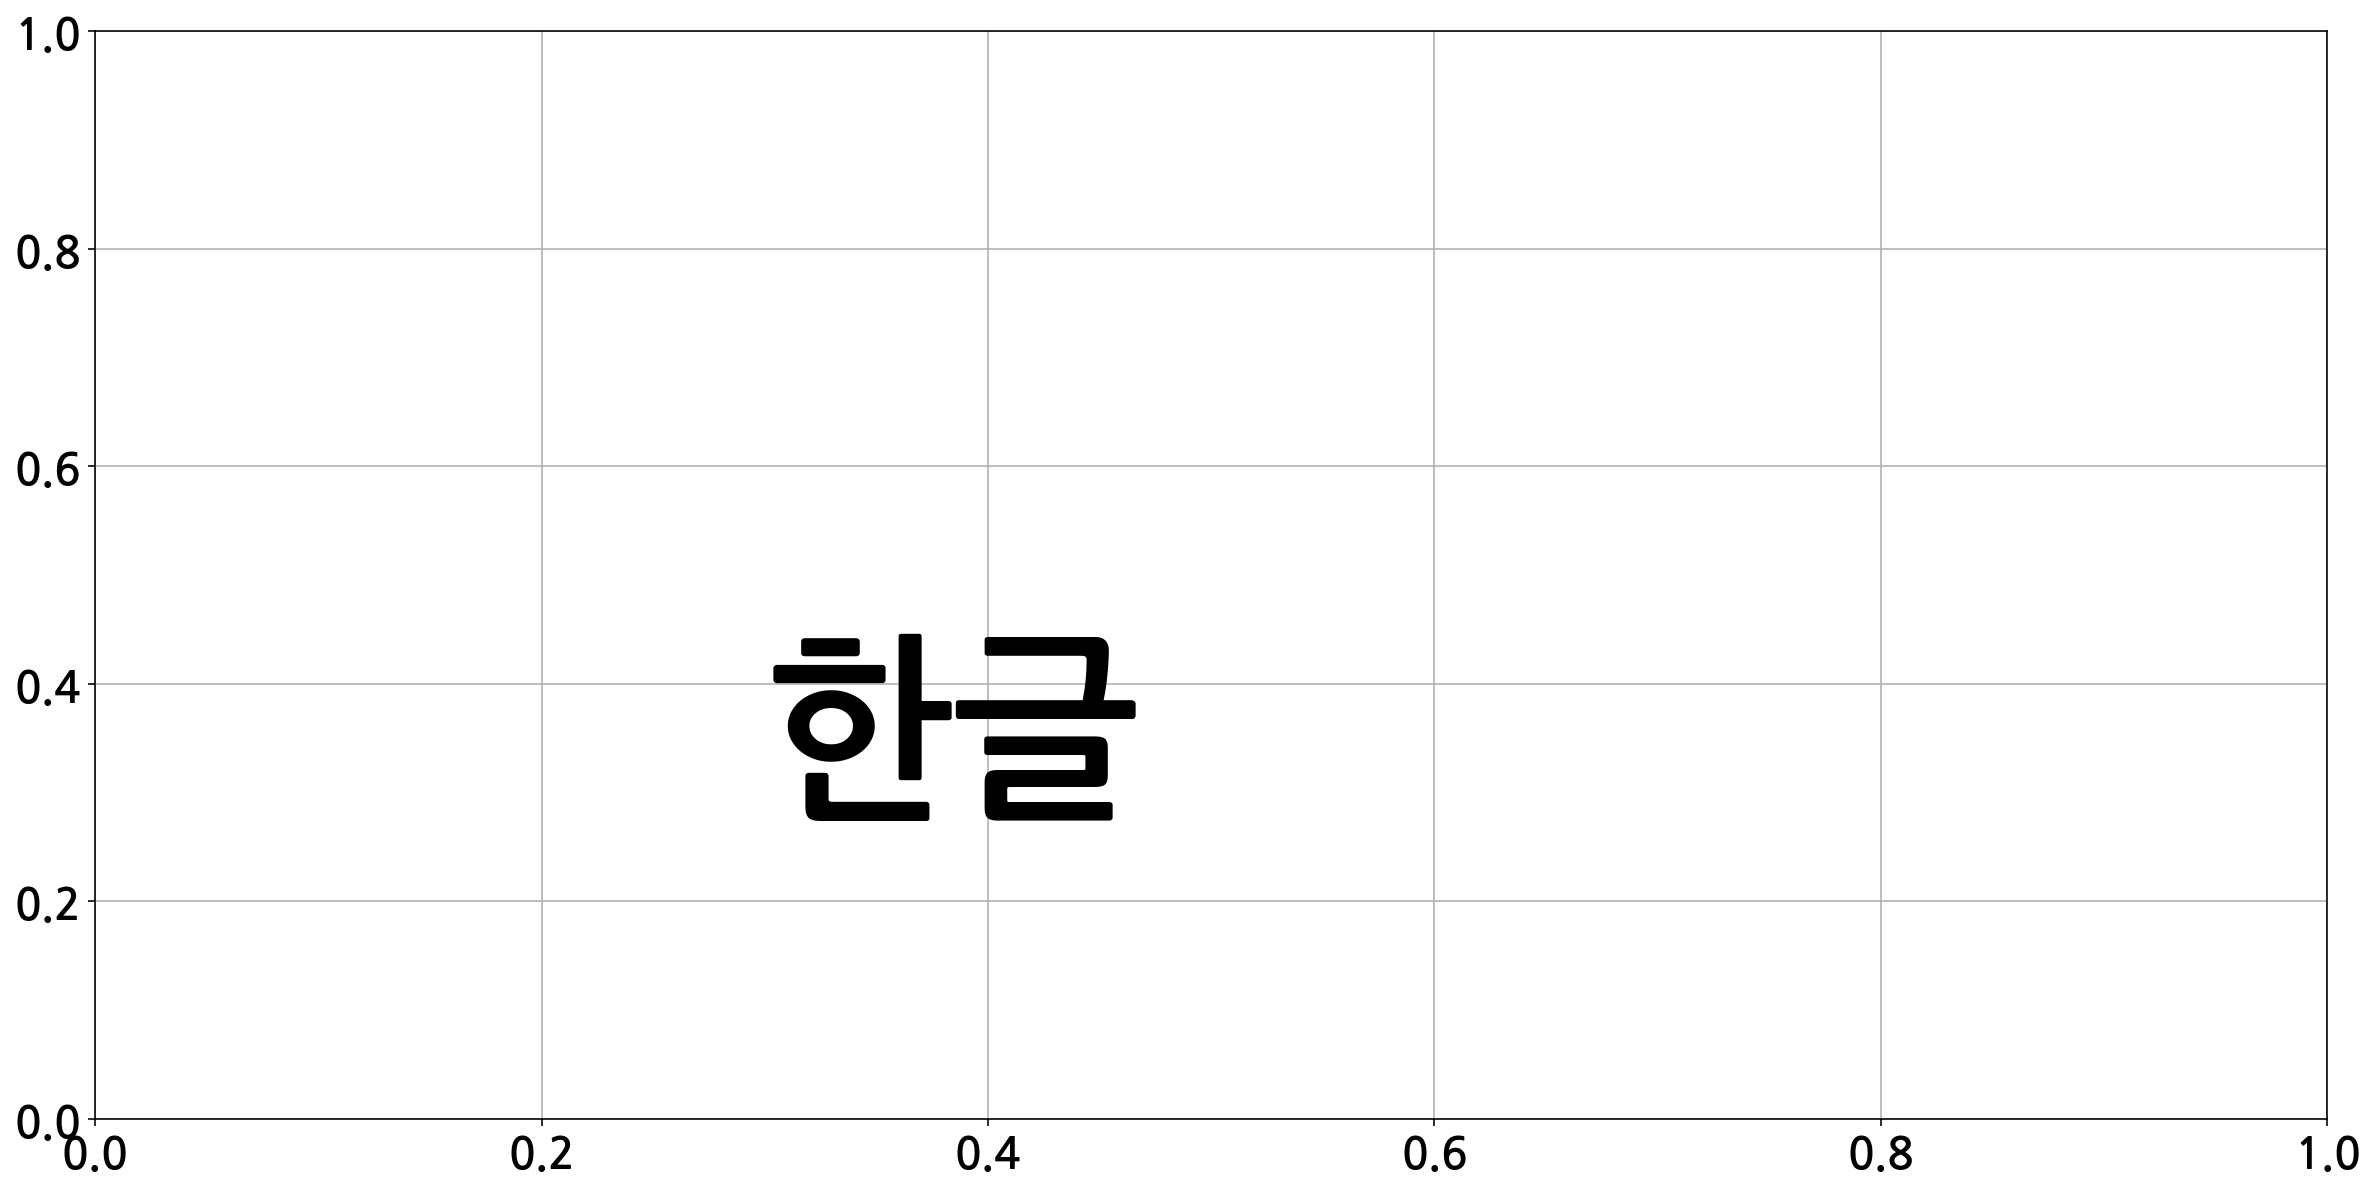

In [211]:
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

In [212]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/competition/data'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/competition/data


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/competition/data


In [ ]:
%ls

Samsungcard.csv  Samsungcard.xlsx


In [214]:
import pandas as pd
Samsungcard= pd.read_csv('Samsungcard.csv', encoding="EUC-KR")
Samsungcard.head()

소비일자   소비업종  성별  연령대   소비건수
0  20190101  가전/가구  남성  20대   5529
1  20190101  가전/가구  남성  30대  17536
2  20190101  가전/가구  남성  40대  22838
3  20190101  가전/가구  남성  50대  15801
4  20190101  가전/가구  남성  60대   6772

## 날짜 데이터 가공
- 날짜 데이터를 가공하는 것을 연습한다. 

### (1) 날짜데이터 확인
- 날짜 데이터를 문자 또는 숫자와는 조금 다르기 때문에, 반드시 날짜 데이터 형태로 변환해줘야 한다. 

In [ ]:
Samsungcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76580 entries, 0 to 76579
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   소비일자    76580 non-null  int64 
 1   소비업종    76580 non-null  object
 2   성별      76580 non-null  object
 3   연령대     76580 non-null  object
 4   소비건수    76580 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.9+ MB


### (2) 날짜데이터 샘플링
- 데이터가 크기 때문에, 시각화할 때, 주의할 필요가 있다. 
- 따라서, 데이터의 개수를 줄이도록 한다. 
- 약 1%의 데이터만 추출한다. 

In [215]:
data = Samsungcard.groupby('소비일자').sample(frac=.1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658 entries, 91 to 76443
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   소비일자    7658 non-null   int64 
 1   소비업종    7658 non-null   object
 2   성별      7658 non-null   object
 3   연령대     7658 non-null   object
 4   소비건수    7658 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 359.0+ KB


### (3) 날짜데이터 변환
- 날짜 데이터를 변환하는 코드를 작성한다. 

In [216]:
data['소비일자'] = data['소비일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

- 실제 변환되었는지 확인해본다. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658 entries, 101 to 76474
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   소비일자    7658 non-null   datetime64[ns]
 1   소비업종    7658 non-null   object        
 2   성별      7658 non-null   object        
 3   연령대     7658 non-null   object        
 4   소비건수    7658 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 359.0+ KB


In [217]:
data.reset_index(inplace = True, drop = True)
data

소비일자         소비업종  성별  연령대    소비건수
0    2019-01-01          자동차  남성  30대   25860
1    2019-01-01        여행/교통  여성  40대   66375
2    2019-01-01       할인점/마트  남성  20대  146935
3    2019-01-01        가전/가구  남성  60대    6772
4    2019-01-01           미용  여성  30대   27804
...         ...          ...  ..  ...     ...
7653 2020-06-30           미용  남성  40대   33492
7654 2020-06-30  백화점/상품권/아울렛  남성  20대   13863
7655 2020-06-30        가전/가구  여성  20대    9092
7656 2020-06-30        패션/잡화  여성  40대   30090
7657 2020-06-30        가전/가구  남성  50대   42429

[7658 rows x 5 columns]

### (4) 날짜데이터 Pivot_Table
- 본격적으로 날짜데이터를 기준으로 데이터를 가공한다.  
- `pivot_table`을 활용해서 데이터를 요약해본다. 
  + 그러나, 이 함수는 가장 최종적인 단계에서 사용해주는 것을 권한다. 

In [ ]:
import numpy as np

In [ ]:
temp = data.copy()
temp.pivot_table(index='소비일자',   # axis 0
                 columns='성별', # axis 1
                 values='소비건수',  # 집계값
                 aggfunc=np.mean, # 집계방법
                 fill_value=0).round(2) # null인경우

성별                 남성         여성
소비일자                            
2019-01-01   61077.20  132016.11
2019-01-02  186937.88  124379.17
2019-01-03  189847.00  121894.71
2019-01-04   83979.00   68216.43
2019-01-05   54597.86   82442.14
...               ...        ...
2020-06-26  190576.00   58800.50
2020-06-27   66703.86   91791.00
2020-06-28   62417.33   99786.12
2020-06-29  133724.50  187911.88
2020-06-30  354606.17  134858.75

[547 rows x 2 columns]

### (5) 날짜데이터 Group By 활용
- `Group By`를 활용하여 데이터를 변환해본다. 

In [218]:
grouped_gender_mean = temp.groupby(["소비일자", "성별"])["소비건수"].mean().round(1).reset_index()
grouped_gender_mean.head()

소비일자  성별      소비건수
0 2019-01-01  남성   61077.2
1 2019-01-01  여성  132016.1
2 2019-01-02  남성  186937.9
3 2019-01-02  여성  124379.2
4 2019-01-03  남성  189847.0

### 날짜데이터 시각화
- 날짜 데이터를 시각화를 해본다. 

### (1) 성별기준

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

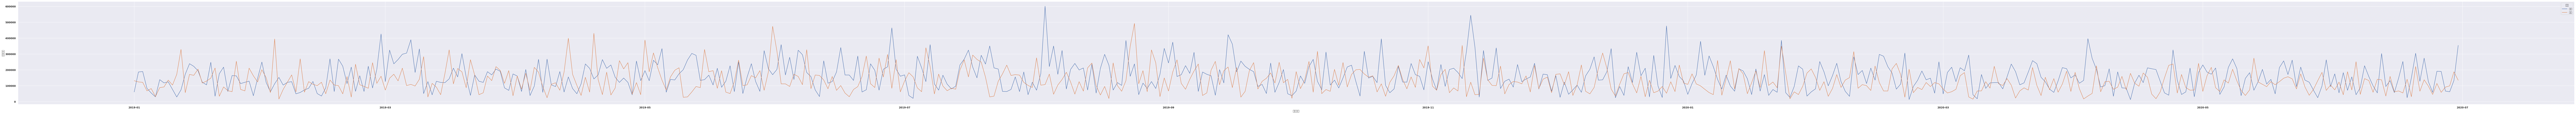

In [240]:
sns.lineplot(data=grouped_gender_mean, x = "소비일자", y = "소비건수", hue = "성별")
plt.show()

- 보다 선명하게 구분하기 위해 남성과 여성을 구분한다. 

In [ ]:
grouped_male_mean = grouped_gender_mean[grouped_gender_mean['성별']=="남성"]
grouped_female_mean = grouped_gender_mean[grouped_gender_mean['성별']=="여성"]

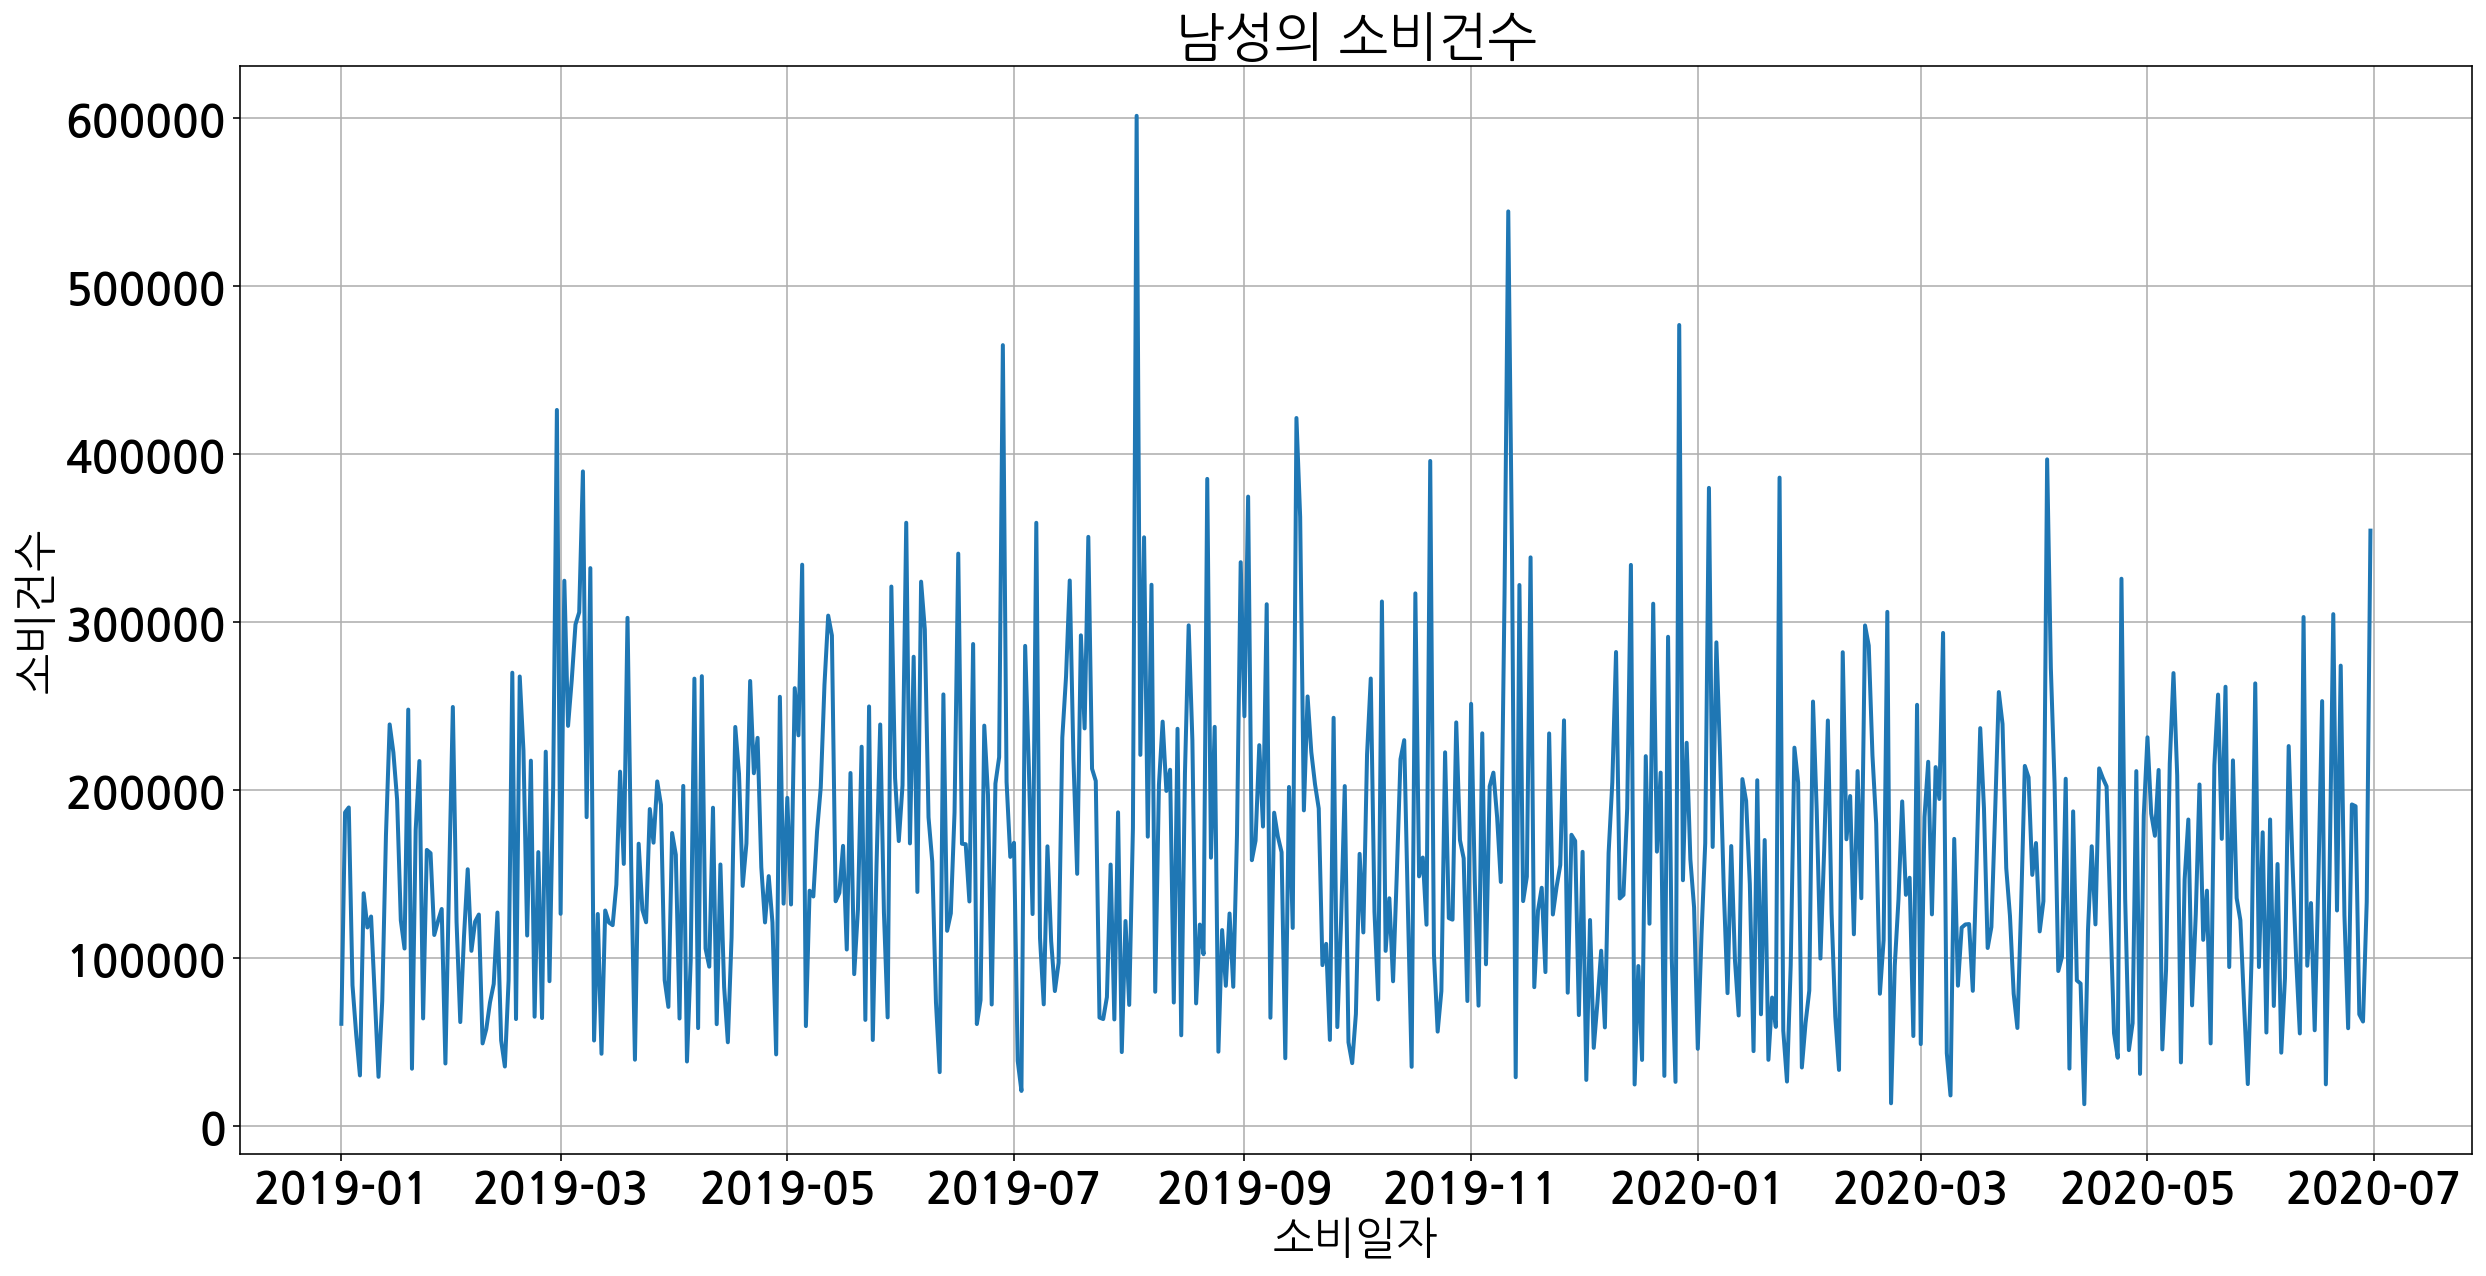

In [ ]:
sns.lineplot(data=grouped_male_mean, x = "소비일자", y = "소비건수")
plt.title("남성의 소비건수")
plt.show()

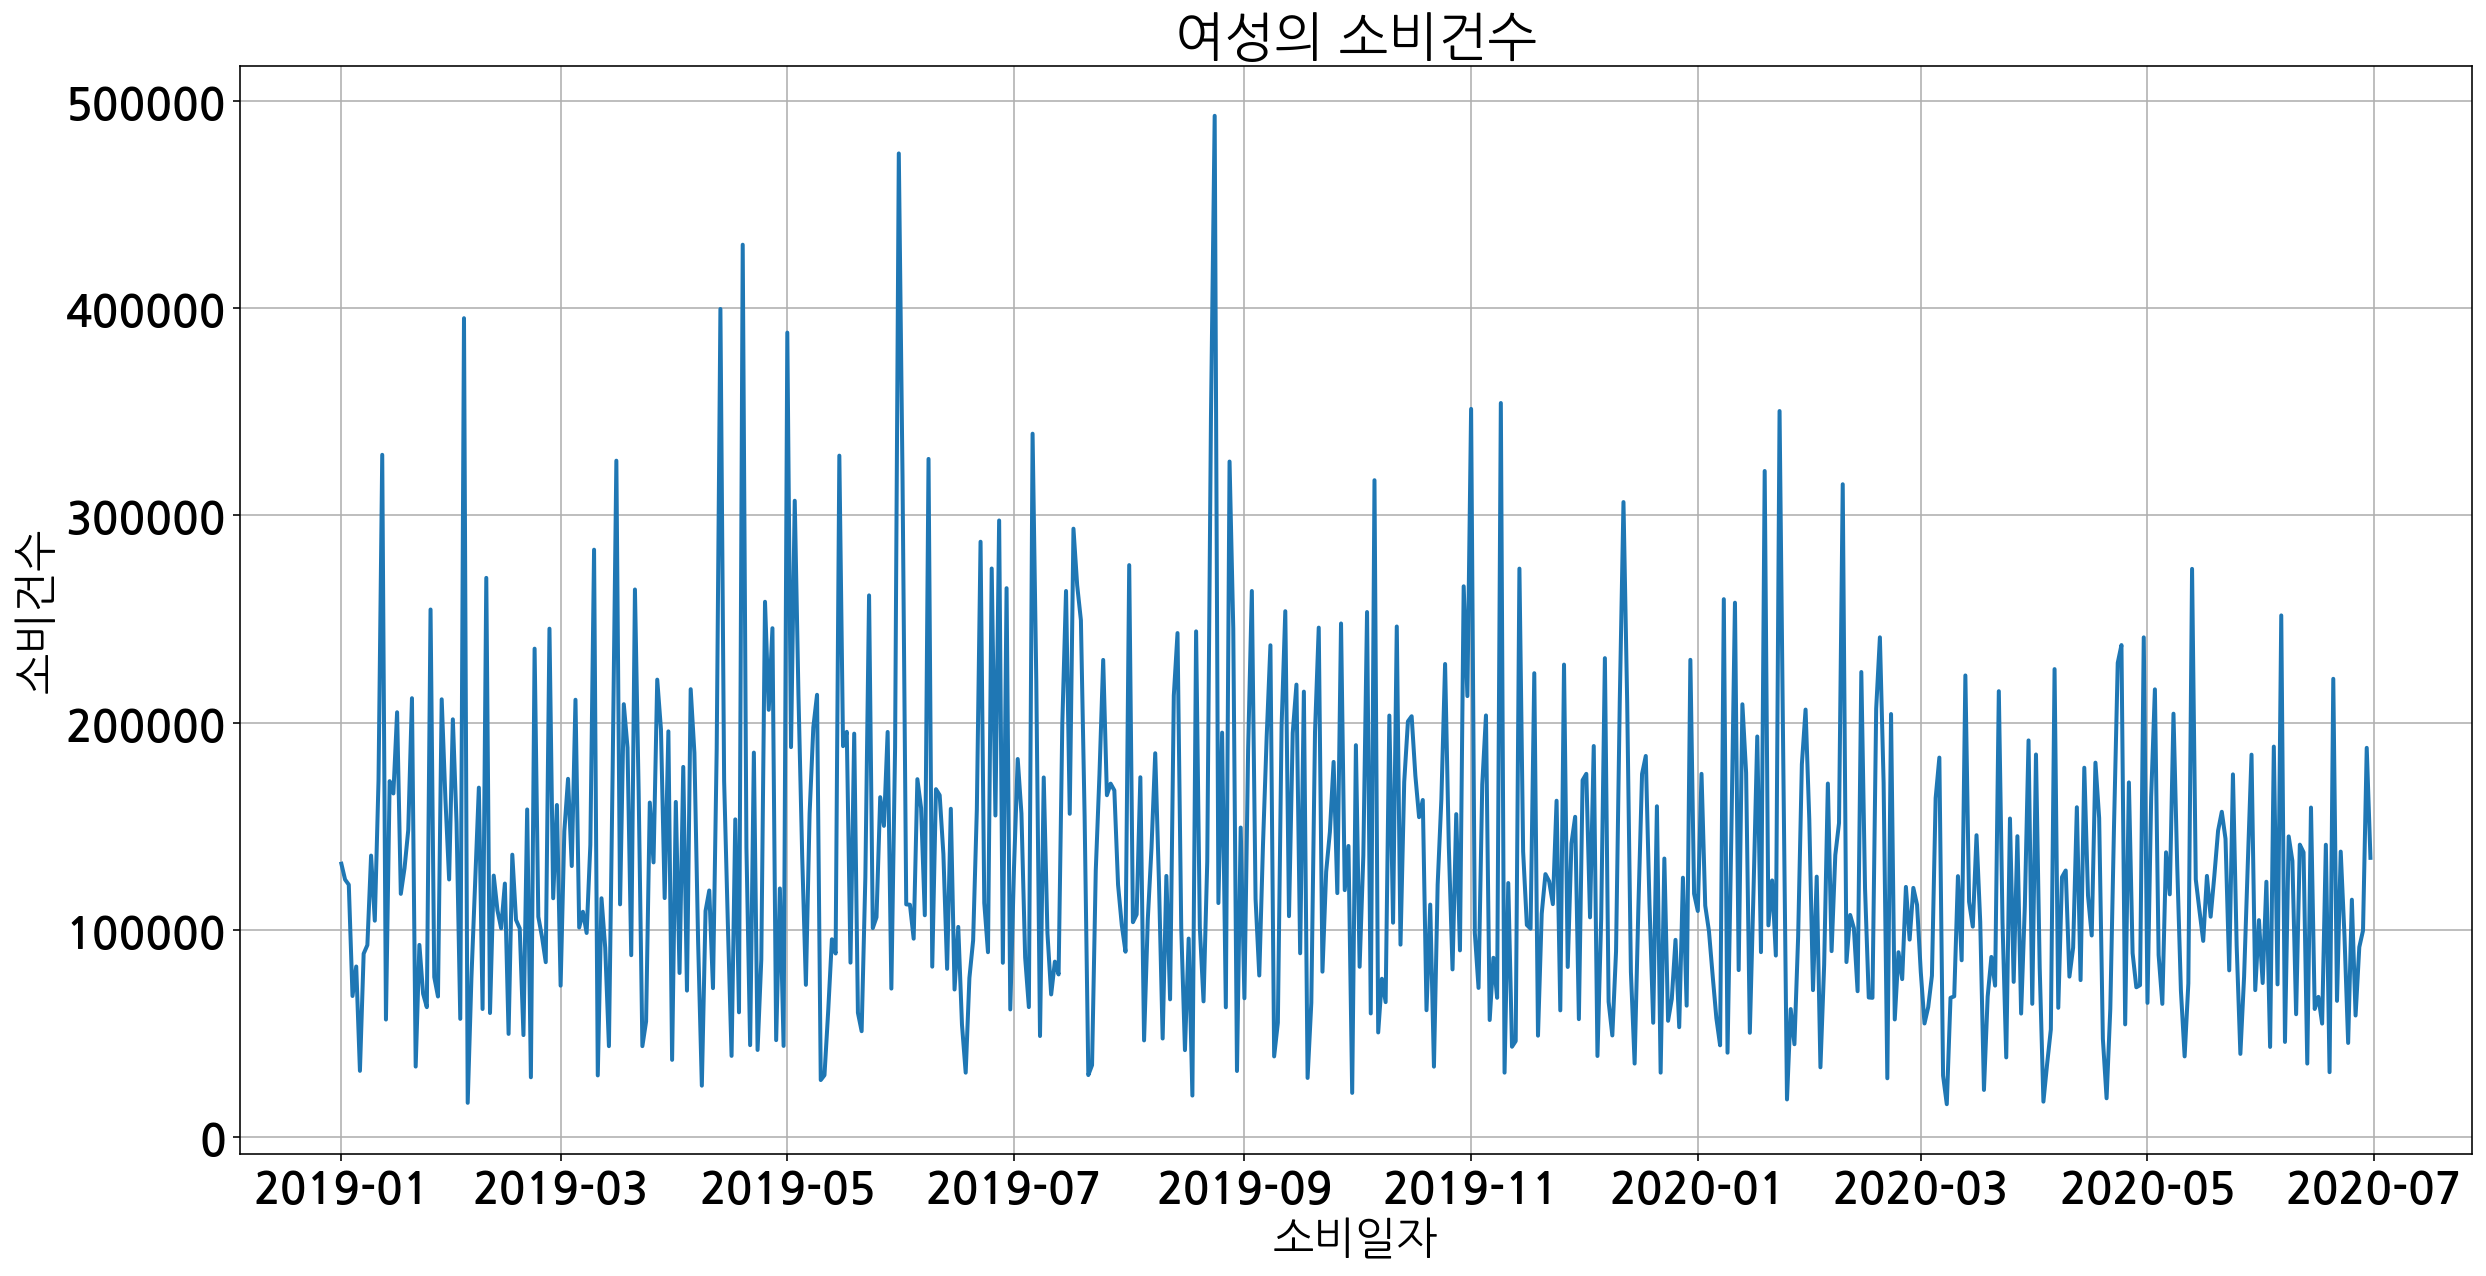

In [ ]:
sns.lineplot(data=grouped_female_mean, x = "소비일자", y = "소비건수")
plt.title("여성의 소비건수")
plt.show()

### (2) Facet Grid 활용
- `Facet Grid`를 활용하여 시각화를 해본다. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


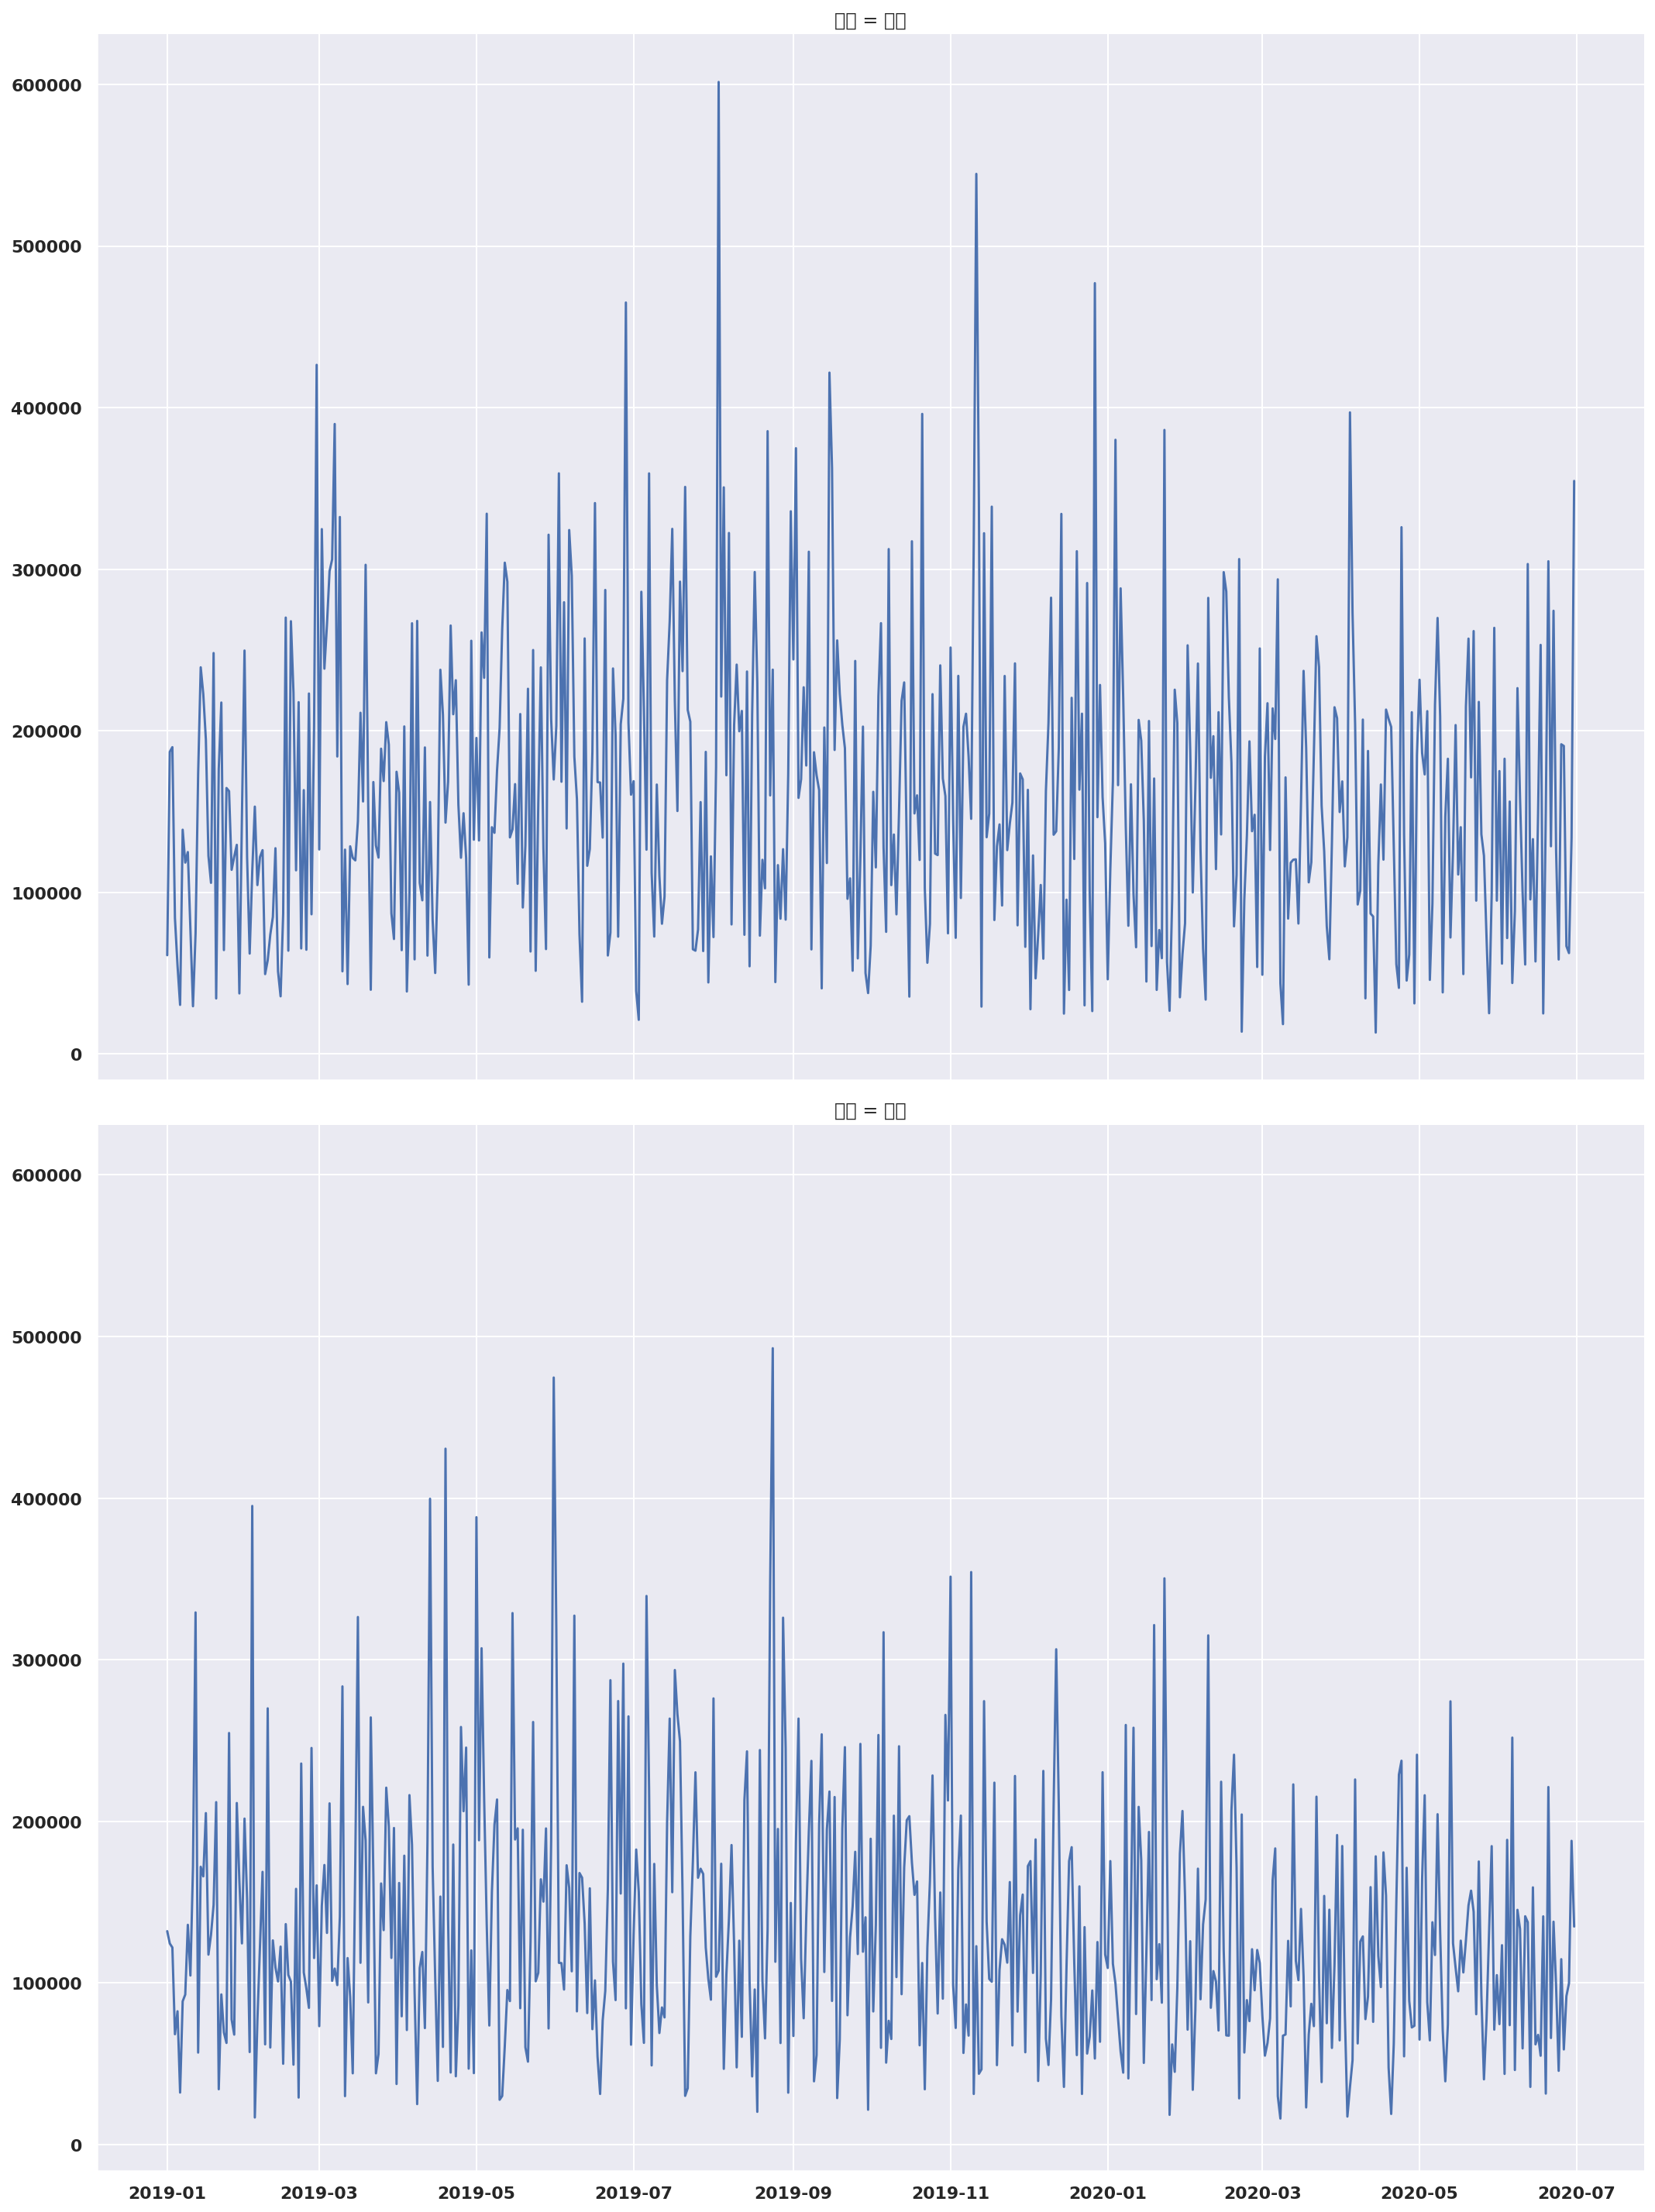

In [239]:
g = sns.FacetGrid(grouped_gender_mean, row="성별", size=10, aspect=1.5)
g.map_dataframe(sns.lineplot, x="소비일자", y = "소비건수")